# Creating and Backtesting Mean-Reversion Strategies (Bollinger Bands)

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")
#!pip install pandas_datareader
import pandas_datareader.data as web

In [2]:
start= pd.to_datetime('2016-01-01')
end= pd.to_datetime('2021-03-01')
data = web.DataReader('BTC-USD','yahoo',start, end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,436.246002,427.515015,430.721008,434.334015,36278900.0,434.334015
2016-01-02,436.062012,431.869995,434.622009,433.437988,30096600.0,433.437988
2016-01-03,433.743011,424.705994,433.578003,430.010986,39633800.0,430.010986
2016-01-04,434.516998,429.084015,430.061005,433.091003,38477500.0,433.091003
2016-01-05,434.182007,429.675995,433.069000,431.959991,34522600.0,431.959991


In [3]:
data.drop(['High','Low','Open','Volume','Adj Close'], axis=1,inplace=True)

In [4]:
data.to_csv("BTC_close.csv")

In [5]:
data = pd.read_csv("BTC_close.csv", parse_dates = [0], index_col = 0)

In [6]:
data

,Close
Date,
2016-01-01,434.334015
2016-01-02,433.437988
2016-01-03,430.010986
2016-01-04,433.091003
2016-01-05,431.959991
...,...
2021-02-26,46339.761719
2021-02-27,46188.453125
2021-02-28,45137.769531


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1884 entries, 2016-01-01 to 2021-03-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1884 non-null   float64
dtypes: float64(1)
memory usage: 29.4 KB


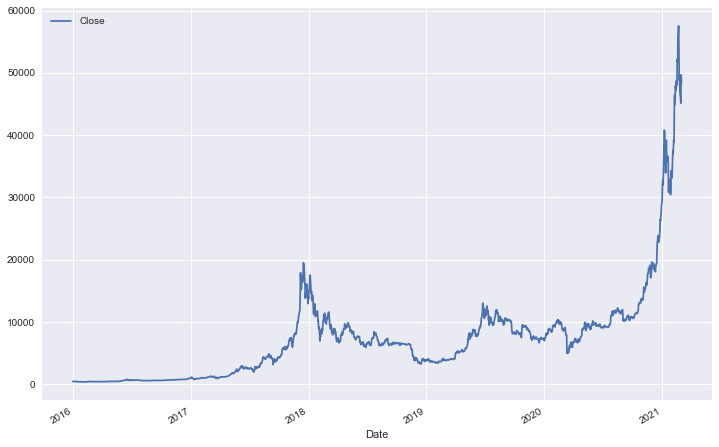

In [8]:
data.plot(figsize = (12, 8))
plt.show()

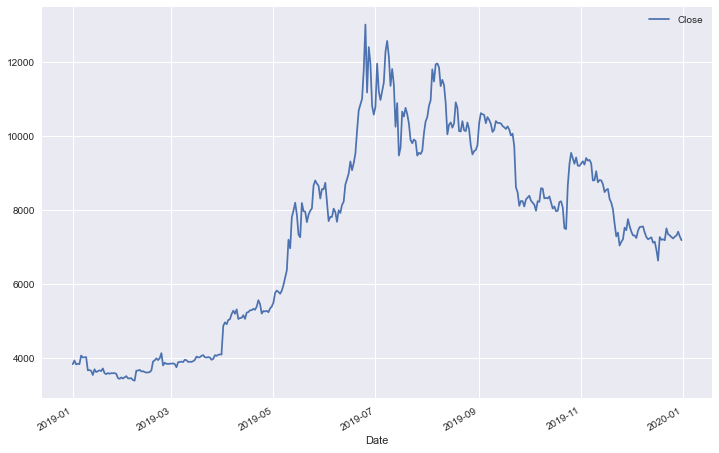

In [9]:
data.loc["2019"].plot(figsize = (12, 8))
plt.show()

In [10]:
data["returns"] = np.log(data.div(data.shift(1)))

In [11]:
data

,Close,returns
Date,,
2016-01-01,434.334015,NaN
2016-01-02,433.437988,-0.002065
2016-01-03,430.010986,-0.007938
2016-01-04,433.091003,0.007137
2016-01-05,431.959991,-0.002615
...,...,...
2021-02-26,46339.761719,-0.016142
2021-02-27,46188.453125,-0.003271
2021-02-28,45137.769531,-0.023010


## Defining a Mean-Reversion Strategy (Bollinger Bands) (Part 1)

__Mean Reversion__: Financial Instruments are from time to time overbought / oversold and revert back to mean prices. 

__Bollinger Bands__: Consists of a SMA (e.g. 20) and Upper and Lower Bands +- (2) Std Dev away from SMA.

In [12]:
SMA = 20
dev = 2

In [13]:
data["SMA"] = data["Close"].rolling(SMA).mean()

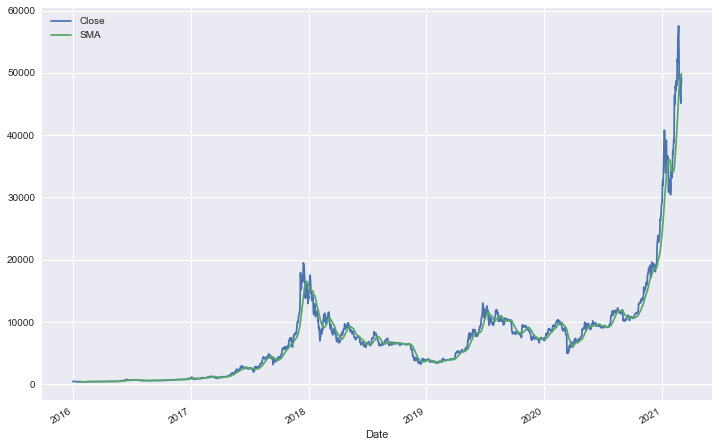

In [14]:
data[["Close", "SMA"]].plot(figsize = (12, 8))
plt.show()

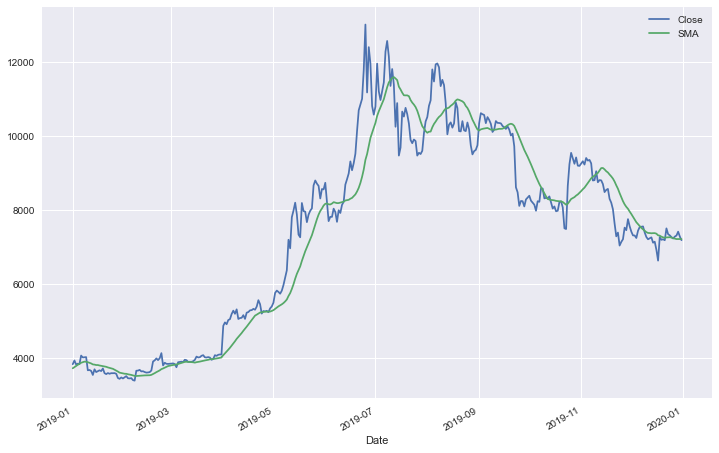

In [15]:
data.loc["2019", ["Close", "SMA"]].plot(figsize = (12, 8))
plt.show()

In [16]:
data["Close"].rolling(SMA).std()

Date
2016-01-01            NaN
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05            NaN
                 ...     
2021-02-26    4390.864737
2021-02-27    3744.564596
2021-02-28    3802.024702
2021-03-01    3733.630190
2021-03-02    3577.818093
Name: Close, Length: 1884, dtype: float64

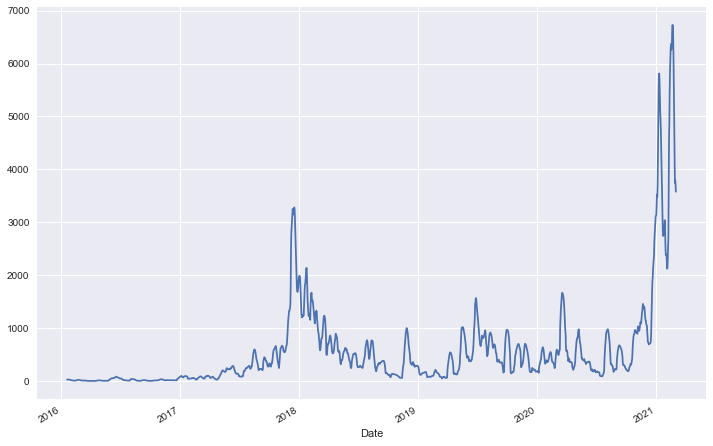

In [17]:
data["Close"].rolling(SMA).std().plot(figsize = (12, 8 ))
plt.show()

In [18]:
data["Lower"] = data["SMA"] - data["Close"].rolling(SMA).std() * dev # Lower Band -2 Std Dev

In [19]:
data["Upper"] = data["SMA"] + data["Close"].rolling(SMA).std() * dev # Upper Band -2 Std Dev

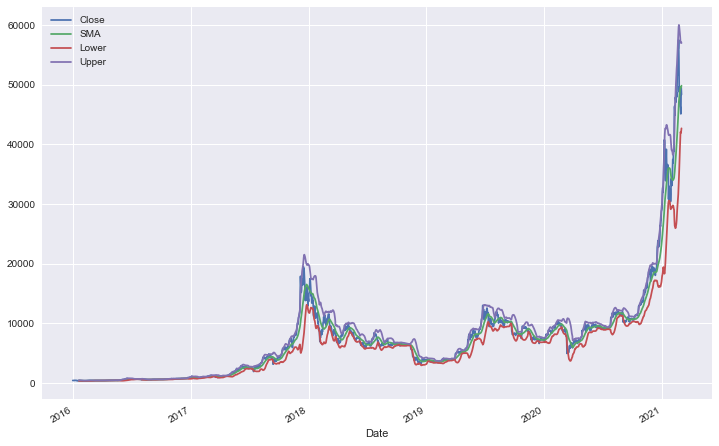

In [20]:
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

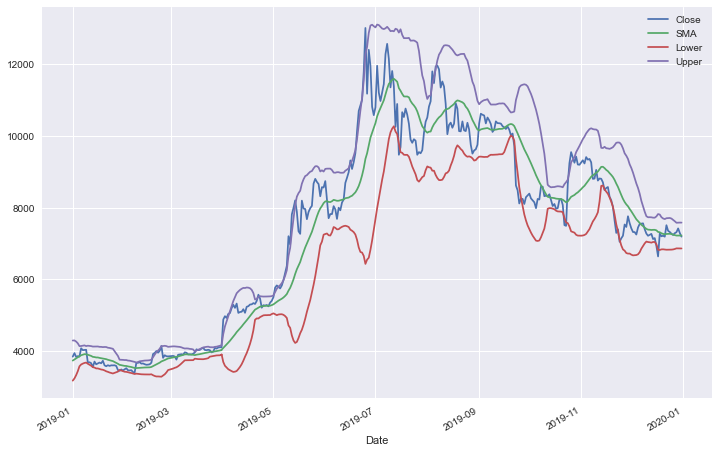

In [21]:
data.drop(columns = "returns").loc["2019"].plot(figsize = (12, 8))
plt.show()

In [22]:
data.dropna(inplace = True)

## Defining a Mean-Reversion Strategy (Bollinger Bands) (Part 2)

In [23]:
data

,Close,returns,SMA,Lower,Upper
Date,,,,,
2016-01-20,420.230011,0.100239,423.366351,368.481450,478.251253
2016-01-21,410.261993,-0.024006,422.162750,367.234787,477.090714
2016-01-22,382.492004,-0.070088,419.615451,362.219324,477.011578
2016-01-23,387.490997,0.012985,417.489452,358.584508,476.394395
2016-01-24,402.971008,0.039172,415.983452,357.218031,474.748873
...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,49220.410352,40438.680877,58002.139826
2021-02-27,46188.453125,-0.003271,49584.660937,42095.531745,57073.790130
2021-02-28,45137.769531,-0.023010,49531.726172,41927.676768,57135.775576


In [24]:
data["distance"] = data.Close - data.SMA # helper Column

In [25]:
data["position"] = np.where(data.Close < data.Lower, 1, np.nan) # 1. oversold -> go long

In [26]:
data["position"] = np.where(data.Close > data.Upper, -1, data["position"]) # 2. overbought -> go short

In [27]:
data.tail()

,Close,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2021-02-26,46339.761719,-0.016142,49220.410352,40438.680877,58002.139826,-2880.648633,NaN
2021-02-27,46188.453125,-0.003271,49584.660937,42095.531745,57073.790130,-3396.207812,NaN
2021-02-28,45137.769531,-0.023010,49531.726172,41927.676768,57135.775576,-4393.956641,NaN
2021-03-01,49631.242188,0.094901,49689.233008,42221.972627,57156.493389,-57.990820,NaN
2021-03-02,48378.988281,-0.025555,49862.273242,42706.637056,57017.909429,-1483.284961,NaN


In [28]:
# 3. crossing SMA ("Middle Band") -> go neutral
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

In [29]:
data

,Close,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2016-01-20,420.230011,0.100239,423.366351,368.481450,478.251253,-3.136340,NaN
2016-01-21,410.261993,-0.024006,422.162750,367.234787,477.090714,-11.900757,NaN
2016-01-22,382.492004,-0.070088,419.615451,362.219324,477.011578,-37.123447,NaN
2016-01-23,387.490997,0.012985,417.489452,358.584508,476.394395,-29.998454,NaN
2016-01-24,402.971008,0.039172,415.983452,357.218031,474.748873,-13.012444,NaN
...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,49220.410352,40438.680877,58002.139826,-2880.648633,NaN
2021-02-27,46188.453125,-0.003271,49584.660937,42095.531745,57073.790130,-3396.207812,NaN
2021-02-28,45137.769531,-0.023010,49531.726172,41927.676768,57135.775576,-4393.956641,NaN


In [30]:
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

In [31]:
data.position.value_counts()

 0.0    806
-1.0    714
 1.0    345
Name: position, dtype: int64

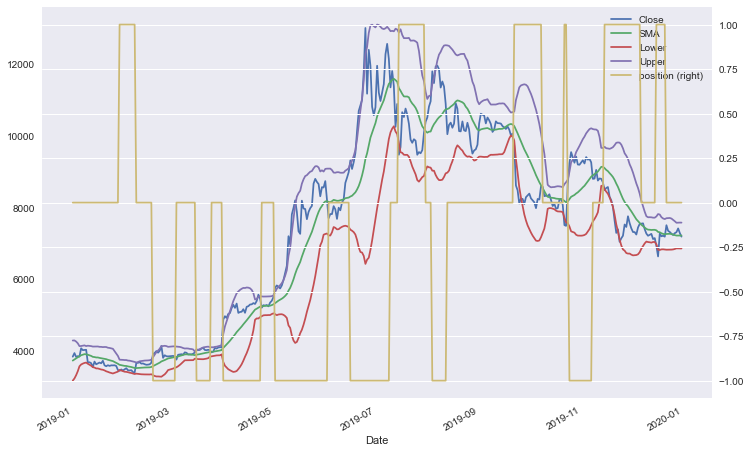

In [32]:
data.drop(columns = ["returns", "distance"]).loc["2019"].plot(figsize = (12, 8), secondary_y = "position")
plt.show()

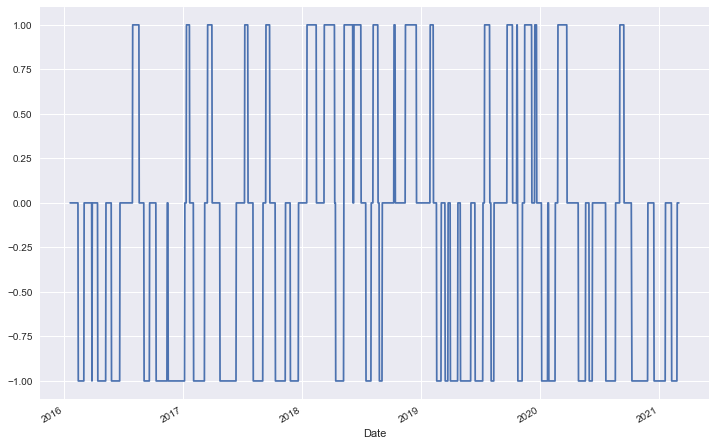

In [33]:
data.position.plot(figsize = (12, 8))
plt.show()

## Vectorized Strategy Backtesting

In [34]:
data

,Close,returns,SMA,Lower,Upper,distance,position
Date,,,,,,,
2016-01-20,420.230011,0.100239,423.366351,368.481450,478.251253,-3.136340,0.0
2016-01-21,410.261993,-0.024006,422.162750,367.234787,477.090714,-11.900757,0.0
2016-01-22,382.492004,-0.070088,419.615451,362.219324,477.011578,-37.123447,0.0
2016-01-23,387.490997,0.012985,417.489452,358.584508,476.394395,-29.998454,0.0
2016-01-24,402.971008,0.039172,415.983452,357.218031,474.748873,-13.012444,0.0
...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,49220.410352,40438.680877,58002.139826,-2880.648633,0.0
2021-02-27,46188.453125,-0.003271,49584.660937,42095.531745,57073.790130,-3396.207812,0.0
2021-02-28,45137.769531,-0.023010,49531.726172,41927.676768,57135.775576,-4393.956641,0.0


In [35]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [36]:
data.dropna(inplace = True)

In [37]:
data

,Close,returns,SMA,Lower,Upper,distance,position,strategy
Date,,,,,,,,
2016-01-21,410.261993,-0.024006,422.162750,367.234787,477.090714,-11.900757,0.0,-0.0
2016-01-22,382.492004,-0.070088,419.615451,362.219324,477.011578,-37.123447,0.0,-0.0
2016-01-23,387.490997,0.012985,417.489452,358.584508,476.394395,-29.998454,0.0,0.0
2016-01-24,402.971008,0.039172,415.983452,357.218031,474.748873,-13.012444,0.0,0.0
2016-01-25,391.726013,-0.028302,413.971753,354.756242,473.187264,-22.245740,0.0,-0.0
...,...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,49220.410352,40438.680877,58002.139826,-2880.648633,0.0,-0.0
2021-02-27,46188.453125,-0.003271,49584.660937,42095.531745,57073.790130,-3396.207812,0.0,-0.0
2021-02-28,45137.769531,-0.023010,49531.726172,41927.676768,57135.775576,-4393.956641,0.0,-0.0


In [38]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

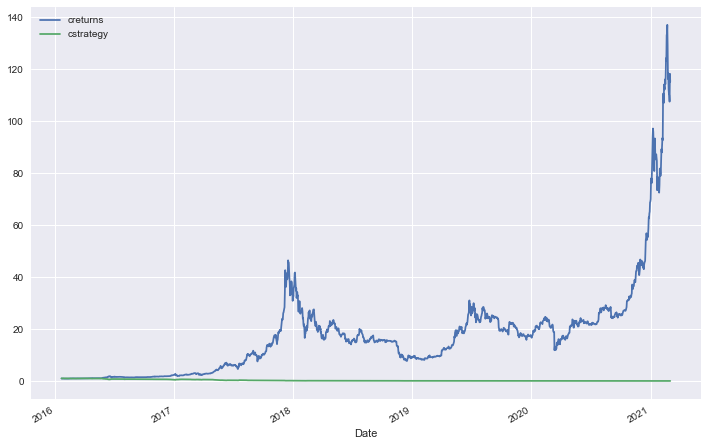

In [39]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [40]:
data

,Close,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy
Date,,,,,,,,,,
2016-01-21,410.261993,-0.024006,422.162750,367.234787,477.090714,-11.900757,0.0,-0.0,0.976280,1.000000
2016-01-22,382.492004,-0.070088,419.615451,362.219324,477.011578,-37.123447,0.0,-0.0,0.910197,1.000000
2016-01-23,387.490997,0.012985,417.489452,358.584508,476.394395,-29.998454,0.0,0.0,0.922093,1.000000
2016-01-24,402.971008,0.039172,415.983452,357.218031,474.748873,-13.012444,0.0,0.0,0.958930,1.000000
2016-01-25,391.726013,-0.028302,413.971753,354.756242,473.187264,-22.245740,0.0,-0.0,0.932170,1.000000
...,...,...,...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,49220.410352,40438.680877,58002.139826,-2880.648633,0.0,-0.0,110.272376,0.010785
2021-02-27,46188.453125,-0.003271,49584.660937,42095.531745,57073.790130,-3396.207812,0.0,-0.0,109.912314,0.010785
2021-02-28,45137.769531,-0.023010,49531.726172,41927.676768,57135.775576,-4393.956641,0.0,-0.0,107.412056,0.010785


In [41]:
ptc = 0.00007

In [42]:
data["trades"] = data.position.diff().fillna(0).abs()

In [43]:
data

,Close,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades
Date,,,,,,,,,,,
2016-01-21,410.261993,-0.024006,422.162750,367.234787,477.090714,-11.900757,0.0,-0.0,0.976280,1.000000,0.0
2016-01-22,382.492004,-0.070088,419.615451,362.219324,477.011578,-37.123447,0.0,-0.0,0.910197,1.000000,0.0
2016-01-23,387.490997,0.012985,417.489452,358.584508,476.394395,-29.998454,0.0,0.0,0.922093,1.000000,0.0
2016-01-24,402.971008,0.039172,415.983452,357.218031,474.748873,-13.012444,0.0,0.0,0.958930,1.000000,0.0
2016-01-25,391.726013,-0.028302,413.971753,354.756242,473.187264,-22.245740,0.0,-0.0,0.932170,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,49220.410352,40438.680877,58002.139826,-2880.648633,0.0,-0.0,110.272376,0.010785,0.0
2021-02-27,46188.453125,-0.003271,49584.660937,42095.531745,57073.790130,-3396.207812,0.0,-0.0,109.912314,0.010785,0.0
2021-02-28,45137.769531,-0.023010,49531.726172,41927.676768,57135.775576,-4393.956641,0.0,-0.0,107.412056,0.010785,0.0


In [44]:
data.trades.value_counts()

0.0    1764
1.0     100
Name: trades, dtype: int64

In [45]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [46]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [47]:
data

,Close,returns,SMA,Lower,Upper,distance,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,
2016-01-21,410.261993,-0.024006,422.162750,367.234787,477.090714,-11.900757,0.0,-0.0,0.976280,1.000000,0.0,-0.0,1.00000
2016-01-22,382.492004,-0.070088,419.615451,362.219324,477.011578,-37.123447,0.0,-0.0,0.910197,1.000000,0.0,-0.0,1.00000
2016-01-23,387.490997,0.012985,417.489452,358.584508,476.394395,-29.998454,0.0,0.0,0.922093,1.000000,0.0,0.0,1.00000
2016-01-24,402.971008,0.039172,415.983452,357.218031,474.748873,-13.012444,0.0,0.0,0.958930,1.000000,0.0,0.0,1.00000
2016-01-25,391.726013,-0.028302,413.971753,354.756242,473.187264,-22.245740,0.0,-0.0,0.932170,1.000000,0.0,-0.0,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,49220.410352,40438.680877,58002.139826,-2880.648633,0.0,-0.0,110.272376,0.010785,0.0,-0.0,0.01071
2021-02-27,46188.453125,-0.003271,49584.660937,42095.531745,57073.790130,-3396.207812,0.0,-0.0,109.912314,0.010785,0.0,-0.0,0.01071
2021-02-28,45137.769531,-0.023010,49531.726172,41927.676768,57135.775576,-4393.956641,0.0,-0.0,107.412056,0.010785,0.0,-0.0,0.01071


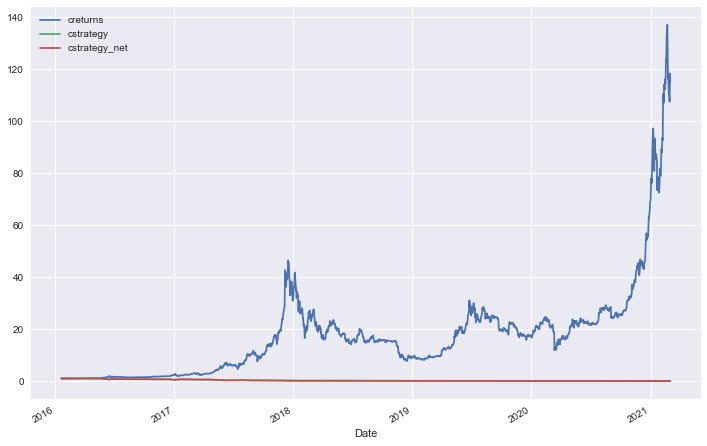

In [48]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [49]:
data[["returns", "strategy_net"]].mean() * (4 * 365) # annualized return

returns         3.717375
strategy_net   -3.553353
dtype: float64

In [50]:
data[["returns", "strategy_net"]].std() * np.sqrt(4 * 365) # annualized risk

returns         1.529154
strategy_net    1.261745
dtype: float64

## Using the BBBacktester Class

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [52]:
class BBBacktester():
    ''' Class for the vectorized backtesting of Mean Reversion-based trading strategies (Bollinger Bands).

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    SMA: int
        time window for SMA
    dev: int
        distance for Lower/Upper Bands in Standard Deviation units
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    tc: float
        proportional transaction costs per trade
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets one or two new parameters for SMA and dev
        
    test_strategy:
        runs the backtest for the Mean Reversion-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the two parameters
    '''
    
    def __init__(self, symbol, SMA, dev, start, end, tc):
        self.symbol = symbol
        self.SMA = SMA
        self.dev = dev
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None
        self.get_data()
        
    def __repr__(self):
        rep = "BBBacktester(symbol = {}, SMA = {}, dev = {}, start = {}, end = {})"
        return rep.format(self.symbol, self.SMA, self.dev, self.start, self.end)
        
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = pd.read_csv("BTC_close.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "Close"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA"] = raw["Close"].rolling(self.SMA).mean()
        raw["Lower"] = raw["SMA"] - raw["Close"].rolling(self.SMA).std() * self.dev
        raw["Upper"] = raw["SMA"] + raw["Close"].rolling(self.SMA).std() * self.dev
        self.data = raw
        return raw
        
    def set_parameters(self, SMA = None, dev = None):
        ''' Updates parameters and resp. time series.
        '''
        if SMA is not None:
            self.SMA = SMA
            self.data["SMA"] = self.data["Close"].rolling(self.SMA).mean()
            self.data["Lower"] = self.data["SMA"] - self.data["Close"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["Close"].rolling(self.SMA).std() * self.dev
            
        if dev is not None:
            self.dev = dev
            self.data["Lower"] = self.data["SMA"] - self.data["Close"].rolling(self.SMA).std() * self.dev
            self.data["Upper"] = self.data["SMA"] + self.data["Close"].rolling(self.SMA).std() * self.dev
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["distance"] = data.Close - data.SMA
        data["position"] = np.where(data.Close < data.Lower, 1, np.nan)
        data["position"] = np.where(data.Close > data.Upper, -1, data["position"])
        data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])
        data["position"] = data.position.ffill().fillna(0)
        data["strategy"] = data.position.shift(1) * data["returns"]
        data.dropna(inplace = True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        trades=data.trades.value_counts()

        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        # absolute performance of the strategy
        perf = data["cstrategy"].iloc[-1]
        # out-/underperformance of strategy
        outperf = perf - data["creturns"].iloc[-1]
        
        return round(perf, 6), round(outperf, 6), trades
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | SMA = {} | dev = {} | TC = {}".format(self.symbol, self.SMA, self.dev, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, boll):
        ''' Updates parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        Params: tuple
            parameter tuple with SMA and dist
        '''
        self.set_parameters(int(boll[0]), int(boll[1]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, SMA_range, dev_range):
        ''' Finds global maximum given the parameter ranges.

        Parameters
        ==========
        SMA_range, dist_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA_range, dev_range), finish=None)
        return opt, -self.update_and_run(opt)


In [53]:
tester = BBBacktester("Close", 20, 2, "2016-01-01", "2020-12-31", 0)

In [54]:
tester

BBBacktester(symbol = Close, SMA = 20, dev = 2, start = 2016-01-01, end = 2020-12-31)

In [55]:
tester.test_strategy()

(0.013476,
 -69.000445,
 0.0    1706
 1.0      97
 Name: trades, dtype: int64)

In [56]:
tester.results

,Close,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,
2016-01-21,410.261993,-0.024006,422.162750,367.234787,477.090714,-11.900757,0.0,-0.000000,0.0,0.976280,1.000000
2016-01-22,382.492004,-0.070088,419.615451,362.219324,477.011578,-37.123447,0.0,-0.000000,0.0,0.910197,1.000000
2016-01-23,387.490997,0.012985,417.489452,358.584508,476.394395,-29.998454,0.0,0.000000,0.0,0.922093,1.000000
2016-01-24,402.971008,0.039172,415.983452,357.218031,474.748873,-13.012444,0.0,0.000000,0.0,0.958930,1.000000
2016-01-25,391.726013,-0.028302,413.971753,354.756242,473.187264,-22.245740,0.0,-0.000000,0.0,0.932170,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,26272.294922,-0.006251,21767.354687,16186.159556,27348.549819,4504.940234,-1.0,0.006251,0.0,62.518845,0.014876
2020-12-28,27084.808594,0.030458,22205.537891,16392.302141,28018.773640,4879.270703,-1.0,-0.030458,0.0,64.452342,0.014430
2020-12-29,27362.437500,0.010198,22645.963965,16665.295270,28626.632659,4716.473535,-1.0,-0.010198,0.0,65.113002,0.014283


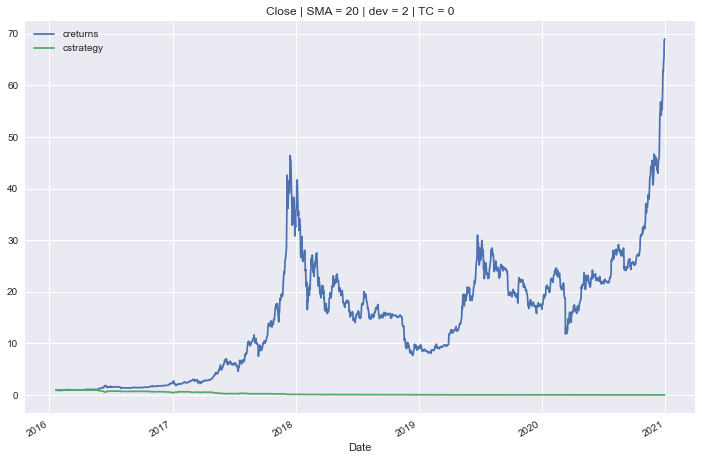

In [57]:
tester.plot_results()

In [58]:
tester.optimize_parameters((9, 100, 1), (1, 10, 1))

(array([47.,  5.]), 1.072773)

In [59]:
tester.test_strategy()

(1.072773,
 -70.099189,
 0.0    1774
 1.0       2
 Name: trades, dtype: int64)

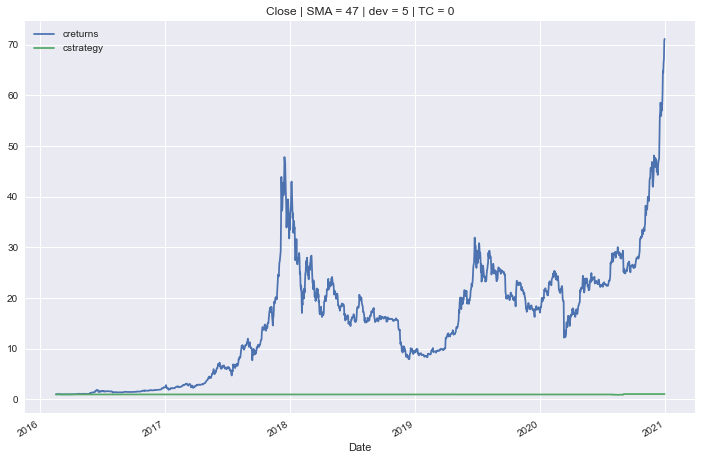

In [60]:
tester.plot_results()

In [61]:
tester.results

,Close,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,
2016-02-17,416.321991,0.021447,401.419362,266.823302,536.015421,14.902629,0.0,0.0,0.0,1.021679,1.000000
2016-02-18,422.372986,0.014430,401.183936,267.781799,534.586073,21.189050,0.0,0.0,0.0,1.036529,1.000000
2016-02-19,420.785004,-0.003767,400.987638,268.502464,533.472813,19.797365,0.0,-0.0,0.0,1.032632,1.000000
2016-02-20,437.164001,0.038186,401.074298,268.020652,534.127944,36.089703,0.0,0.0,0.0,1.072827,1.000000
2016-02-21,438.798004,0.003731,401.219788,267.213422,535.226153,37.578217,0.0,0.0,0.0,1.076837,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,26272.294922,-0.006251,19598.003782,5826.336696,33369.670867,6674.291140,0.0,-0.0,0.0,64.473787,1.072773
2020-12-28,27084.808594,0.030458,19840.205244,5336.019529,34344.390960,7244.603349,0.0,0.0,0.0,66.467744,1.072773
2020-12-29,27362.437500,0.010198,20076.079579,4818.306678,35333.852481,7286.357921,0.0,0.0,0.0,67.149062,1.072773
